# COGS 108 - Popular Majors and Employment Rates

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [X] YES - make available
* [  ] NO - keep private

# Overview

Declaring one’s major is often the first step in determining the future of college graduates, but do graduates in certain major departments have an easier time finding jobs than others? Our project explores the relationship between the popularity of one’s major and the subsequent rate of employment that these graduates are met with. Looking at the number of graduates declaring a particular major, our datasets provide the corresponding counts of male and female graduates, the number of graduates that were employed, as well as the counts of graduates working jobs requiring and not requiring college degrees. 

# Names

- Alex Cheng
- Samarth Arora
- Terence Ting
- Thomas Kolinek
- Yicong Guo

<a id='research_question'></a>
# Research Question

Is there a relationship between the popularity of one's major and the employment rate of related fields of work requiring a degree in that particular major?


<a id='background'></a>

## Background & Prior Work

Many high school students go to college hoping to get a degree so that they can find a satisfying job in the future. Many students may follow their passion, while others may simply pursue a degree that provides them with better career opportunities. However, students who do not attend college or do not have a college degree often struggle to find a job. According to the ‘‘Employment rates of college graduates’’, we can see that the fact that the employment rate was higher for those with higher levels of educational attainment, and in fact, the employment rate was highest for 25 to 34 year-olds with a bachelor’s degree while comparing to the employment rate of people who have some college degree or high school degree, therefore, we can tell that degrees are one of the most important factors that could affect employment rates. Moreover, it is not only the degree that affects employment rates, but also the popularity of a person's major. As we go deeper into the data that we collected we found out that not all the majors are valued equivalently in the workplace. Based on the analysis that we indicated, we conclude the fact that the popular majors such as STEM, are pre-professional and having a clear career track that is in high demand in society.

*References*
- 1) [Philosophy Degrees and Sales Jobs](https://www.insidehighered.com/news/2019/08/02/new-data-track-graduates-six-popular-majors-through-their-first-three-jobs)
> In this article, data was taken from resume repositories and the first three jobs of graduates within six specific departments were analyzed. Quote: “the six majors were “not totally deterministic, but not totally irrelevant” to career pathways”, meaning there was some effect but it was not a strong correlation. One of the examples used regarded engineering grads and the likelihood of them going into industrial/mechanical engineering or software. The same goes for Language and philosophy grads who likely went into education and journalism/writing. One of the patterns that turned up was that “sales, marketing, management and business, and financial analysis” were common jobs amongst all grads, regardless of major.
- 2) [Employment rates of college graduates](https://nces.ed.gov/fastfacts/display.asp?id=561)
> A chart by the National Center for Education Statistics describing the employment rates of 25 to 34 year olds (in the year 2019). This chart graphs the employment rates of individuals of differing education levels: less than HS completion, HS completion, some college, and BA or higher degree. Furthermore, it is split into male and female, allowing us to see the difference in employment between the genders.
- 3) [From Bachelor's Degree to Work](https://play.google.com/store/books/details?id=r1tYbAJBhpYC&rdid=book-r1tYbAJBhpYC&rdot=1)
> This book details a study done with students of the 1992-93 academic year, where students were surveyed on their college enrollment and financial aid situations. In a follow-up survey approximately four years after graduation, participants were asked about details about their employment situation. At the end of the study, engineering majors were shown to be highest in satisfaction as they received positive outcomes for both salary and job benefits. This was similar for computer science majors who reported positive outcomes relative to all graduates. Nursing majors stood out as highest in job stability. Contrastingly, those who majored in education, humanities, and arts fared relatively poorly compared to all graduates, especially in salary and job benefits.

# Hypothesis


We hypothesize that, on average, the more popular one’s major is, the higher the rate of employment within a field that requires a degree in said major. The more people within a declared major category, we expect to see a higher rate of employment requiring a degree in that field.

# Datasets

**Name: grad-students.csv**
- Link: https://www.kaggle.com/fivethirtyeight/fivethirtyeight-college-majors-dataset?select=grad-students.csv
- Observations: 173
- This dataset contains information regarding the count of graduate students (2010-2012, 25+ y/o) broken down by major and whether or not they are employed. It also counts the total number of non-graduate students broken down by major and whether or not they are employed.

**Name: recent-grads.csv**
- Link: https://www.kaggle.com/fivethirtyeight/fivethirtyeight-college-majors-dataset?select=recent-grads.csv
- Observations: 173
- This dataset contains information regarding the count of graduate students (2010-2012, <28 y/o) broken down by major, the count broken down by gender, and whether or not they are employed. It also displays the count of how many students’ employment require college degrees and the count of students working in service jobs.

**Name: all-ages.csv**
- Link: https://www.kaggle.com/fivethirtyeight/fivethirtyeight-college-majors-dataset?select=all-ages.csv
- Observations: 173
- This dataset contains information regarding the count of all students (2010-2012, no grad degree) broken down by major category and whether or not they are employed. It compares the total count of students, their employment status and whether or not they work full time.

By combining grad-students.csv and recent-grads.csv, we can compare the employment rates of students broken down by major category and relate that to how many students are working in jobs relating to their major versus how many are working outside their major. This can then be related to all-ages.csv as it displays the total count of those working in a particular field, regardless of attending graduate school.

# Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

all_ages = pd.read_csv("https://raw.githubusercontent.com/Terence2018/group048/master/all-ages.csv")
recent_grads = pd.read_csv("https://raw.githubusercontent.com/Terence2018/group048/master/recent-grads.csv")
grad_students = pd.read_csv("https://raw.githubusercontent.com/Terence2018/group048/master/grad-students.csv")

# Data Cleaning

We start by printing the columns for each of our datasets so we can examine which columns contain information relevant to our question.

In [2]:
print(all_ages.columns)
print(recent_grads.columns)
print(grad_students.columns)

Index(['Major_code', 'Major', 'Major_category', 'Total', 'Employed',
       'Employed_full_time_year_round', 'Unemployed', 'Unemployment_rate',
       'Median', 'P25th', 'P75th'],
      dtype='object')
Index(['Rank', 'Major_code', 'Major', 'Total', 'Men', 'Women',
       'Major_category', 'ShareWomen', 'Sample_size', 'Employed', 'Full_time',
       'Part_time', 'Full_time_year_round', 'Unemployed', 'Unemployment_rate',
       'Median', 'P25th', 'P75th', 'College_jobs', 'Non_college_jobs',
       'Low_wage_jobs'],
      dtype='object')
Index(['Major_code', 'Major', 'Major_category', 'Grad_total',
       'Grad_sample_size', 'Grad_employed', 'Grad_full_time_year_round',
       'Grad_unemployed', 'Grad_unemployment_rate', 'Grad_median', 'Grad_P25',
       'Grad_P75', 'Nongrad_total', 'Nongrad_employed',
       'Nongrad_full_time_year_round', 'Nongrad_unemployed',
       'Nongrad_unemployment_rate', 'Nongrad_median', 'Nongrad_P25',
       'Nongrad_P75', 'Grad_share', 'Grad_premium'],
      

Since we're interested in employment rates and the popularity of a major (the number of students declaring that particular major), we want to keep columns corresponding to Major, Major category, Total counts, and Employed counts. In the case of `recent_grads` and `grad_students`, we also want to keep the columns relating to the employment situations.  

For `recent_grads` that would be whether the student was employed in a job that required their major degree, employed in a job that *didn't* require their major degree, or worked in a low wage job.   

For `grad_students`, we might also want to look at the counts of employment for graduate students as well as non-graduate students.

In [3]:
#Here, we trim the dataframes to keep only the columns we are interested in. 
all_ages = all_ages[['Major', 'Major_category',
                     'Total', 'Employed']]

recent_grads = recent_grads[['Major', 'Major_category',
                             'Total', 'Men',
                             'Women', 'Employed',
                             'College_jobs', 'Non_college_jobs',
                             'Low_wage_jobs']]

grad_students = grad_students[['Major', 'Major_category',
                               'Grad_total', 'Grad_employed',
                               'Nongrad_total', 'Nongrad_employed']]

In [4]:
#We check each dataframe for null values in the datasets
print(all_ages.isnull().sum().sum())
print(recent_grads.isnull().sum().sum())
print(grad_students.isnull().sum().sum())

0
3
0


In [5]:
#Determining which column `recent_grads` has null values
recent_grads.isnull().sum()

Major               0
Major_category      0
Total               1
Men                 1
Women               1
Employed            0
College_jobs        0
Non_college_jobs    0
Low_wage_jobs       0
dtype: int64

In [6]:
#Determining the index of the row that hall null values
recent_grads[recent_grads['Total'].isnull()]

,Major,Major_category,Total,Men,Women,Employed,College_jobs,Non_college_jobs,Low_wage_jobs
21,FOOD SCIENCE,Agriculture & Natural Resources,NaN,NaN,NaN,3149,1183,1274,485


In [7]:
#Removing the null entry and confirming once more that there are no null values in the dataset
recent_grads = recent_grads.drop(recent_grads.index[21])
recent_grads.isnull().sum().sum()

0

Now that we're done removing any empty cells from all our datasets, we will add a couple columns that will help us in analyzing the data. 

Since we want to look at relations between a major's popularity and the employment rate, we can't directly compare total counts and employed counts since the employed count is just a subset of the total count. Therefore, we need to add columns calculating the percent of the total that are employed.

We added: 
- `%employed` to `all_ages`
- `%college`, `%non`, `%low`, and `%employed` to `recent_grads`
- `grad_employed` and `%nongrad_employed` to `grad_students`

In [8]:
#all_ages
    #%employed represents the percentage of all_ages that are employed
    
all_ages['%employed'] = all_ages['Employed'] / all_ages['Total']

#recent_grads
    #%college represents the percentage of recent_grads in that major that have jobs requiring college degrees
    #%non represents the percentage of recent_grads in that major that have jobs not requiring college degrees
    #%low represents the percentage of recent_grads in that major that have low wage jobs
    #%employed represents the percentage of recent_grads in that major that have jobs
    
recent_grads['%college'] = recent_grads['College_jobs'] / recent_grads['Employed']
recent_grads['%non'] = recent_grads['Non_college_jobs'] / recent_grads['Employed']
recent_grads['%low'] = recent_grads['Low_wage_jobs'] / recent_grads['Employed']
recent_grads['%employed'] = recent_grads['Employed'] / recent_grads['Total']

#grad_students
    #%grad_employed represents the percentage of grad students in that major who are employed
    #%nongrad_employed represents the percentage of non grad students in that major who are employed
    
grad_students['%grad_employed'] = grad_students['Grad_employed'] / grad_students['Grad_total']
grad_students['%nongrad_employed'] = grad_students['Nongrad_employed'] / grad_students['Nongrad_total']

In [9]:
all_ages.head()

,Major,Major_category,Total,Employed,%employed
0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,0.704225
1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,0.806338
2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,0.775173
3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,0.783948
4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,0.711738


In [10]:
recent_grads.head()

,Major,Major_category,Total,Men,Women,Employed,College_jobs,Non_college_jobs,Low_wage_jobs,%college,%non,%low,%employed
0,PETROLEUM ENGINEERING,Engineering,2339.0,2057.0,282.0,1976,1534,364,193,0.776316,0.184211,0.097672,0.844805
1,MINING AND MINERAL ENGINEERING,Engineering,756.0,679.0,77.0,640,350,257,50,0.546875,0.401562,0.078125,0.846561
2,METALLURGICAL ENGINEERING,Engineering,856.0,725.0,131.0,648,456,176,0,0.703704,0.271605,0.000000,0.757009
3,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258.0,1123.0,135.0,758,529,102,0,0.697889,0.134565,0.000000,0.602544
4,CHEMICAL ENGINEERING,Engineering,32260.0,21239.0,11021.0,25694,18314,4440,972,0.712773,0.172803,0.037830,0.796466


In [11]:
grad_students.head()

,Major,Major_category,Grad_total,Grad_employed,Nongrad_total,Nongrad_employed,%grad_employed,%nongrad_employed
0,CONSTRUCTION SERVICES,Industrial Arts & Consumer Services,9173,7098,86062,73607,0.773793,0.855279
1,COMMERCIAL ART AND GRAPHIC DESIGN,Arts,53864,40492,461977,347166,0.751745,0.751479
2,HOSPITALITY MANAGEMENT,Business,24417,18368,179335,145597,0.752263,0.811872
3,COSMETOLOGY SERVICES AND CULINARY ARTS,Industrial Arts & Consumer Services,5411,3590,37575,29738,0.663463,0.791430
4,COMMUNICATION TECHNOLOGIES,Computers & Mathematics,9109,7512,53819,43163,0.824679,0.802003


While we want to see the relationships between individual majors and their employment rates, graphing 173 points along a barchart may become too cluttered. So we will create datasets which group the majors into their major categories for a more condensed representation.

In [12]:
all_ages_major_category = all_ages.groupby('Major_category').sum()

#These columns need to be corrected after the .groupby().sum()
all_ages_major_category['%employed'] = all_ages_major_category['Employed'] / all_ages_major_category['Total']

recent_grads_major_category = recent_grads.groupby('Major_category').sum()

#These columns need to be corrected after the .groupby().sum()
recent_grads_major_category['%college'] = recent_grads_major_category['College_jobs'] / recent_grads_major_category['Total']
recent_grads_major_category['%non'] = recent_grads_major_category['Non_college_jobs'] / recent_grads_major_category['Total']
recent_grads_major_category['%low'] = recent_grads_major_category['Low_wage_jobs'] / recent_grads_major_category['Total']

grad_students_major_category = grad_students.groupby('Major_category').sum()

#These columns need to be corrected after the .groupby().sum()
grad_students_major_category['%grad_employed'] = grad_students_major_category['Grad_employed'] / grad_students_major_category['Grad_total']
grad_students_major_category['%nongrad_employed'] = grad_students_major_category['Nongrad_employed'] / grad_students_major_category['Nongrad_total']
#This column is added to check the difference between %grad_employed and %nongrad_employed
grad_students_major_category['%difference'] = abs(grad_students_major_category['%grad_employed'] - grad_students_major_category['%nongrad_employed'])

In [35]:
all_ages_major_category.head()

,Total,Employed,%employed
Major_category,,,
Agriculture & Natural Resources,632437,480415,0.759625
Arts,1805865,1308695,0.724691
Biology & Life Science,1338186,947058,0.707718
Business,9858741,7529851,0.763774
Communications & Journalism,1803822,1423041,0.788903


In [36]:
recent_grads_major_category.head()

,Total,Men,Women,Employed,College_jobs,Non_college_jobs,Low_wage_jobs,%college,%non,%low,%employed
Major_category,,,,,,,,,,,
Agriculture & Natural Resources,75620.0,40357.0,35263.0,63794,18677,33217,7414,0.246985,0.439262,0.098043,7.745427
Arts,357130.0,134390.0,222740.0,288114,94785,163720,60116,0.265408,0.458433,0.168331,6.525364
Biology & Life Science,453862.0,184919.0,268943.0,302797,151233,127182,42742,0.333214,0.280222,0.094174,9.807596
Business,1302376.0,667852.0,634524.0,1088742,148538,496570,126788,0.114052,0.381280,0.097351,10.785298
Communications & Journalism,392601.0,131921.0,260680.0,330660,86556,172992,49595,0.220468,0.440631,0.126324,3.378136


In [37]:
grad_students_major_category.head()

,Grad_total,Grad_employed,Nongrad_total,Nongrad_employed,%grad_employed,%nongrad_employed,%difference
Major_category,,,,,,,
Agriculture & Natural Resources,241342,179287,599239,453541,0.742875,0.756862,0.013986
Arts,580416,422450,1657523,1194452,0.727840,0.720625,0.007215
Biology & Life Science,1656556,1365336,1145597,831399,0.824202,0.725734,0.098467
Business,2718897,2124495,9345634,7123852,0.781381,0.762265,0.019116
Communications & Journalism,462880,368390,1635679,1285961,0.795865,0.786194,0.009671


# Data Analysis & Results

We can take a look at the average employment rate across all majors as well as the average amount of students per major.

In [13]:
all_ages.describe()

,Total,Employed,%employed
count,1.730000e+02,1.730000e+02,173.000000
mean,2.302566e+05,1.661620e+05,0.724111
std,4.220685e+05,3.073244e+05,0.076085
min,2.396000e+03,1.492000e+03,0.382387
25%,2.428000e+04,1.728100e+04,0.677554
50%,7.579100e+04,5.656400e+04,0.731075
75%,2.057630e+05,1.428790e+05,0.780281
max,3.123510e+06,2.354398e+06,0.859982


Furthermore, we could take a look at the average employment rates and student counts per major category to get a better idea of the distribution across major categories. We'll sort the Total counts by highest to lowest to get an idea of the popularity of certain major categories.

In [14]:
all_ages.groupby('Major_category').mean().sort_values('Total', ascending=False)

,Total,Employed,%employed
Major_category,,,
Business,758364.692308,579219.307692,0.786149
Communications & Journalism,450955.500000,355760.250000,0.787218
Social Science,294902.777778,207978.111111,0.718207
Education,293757.375000,177074.937500,0.634540
Humanities & Liberal Arts,249222.333333,166611.666667,0.679025
Health,245904.916667,182724.333333,0.720580
Arts,225733.125000,163586.875000,0.741598
Psychology & Social Work,220808.666667,156887.000000,0.688919
Law & Public Policy,180585.200000,143784.800000,0.754302


**INSERT STATEMENT DESCRIBING WHAT WE'RE GOING TO DO FOR THIS DATASET**

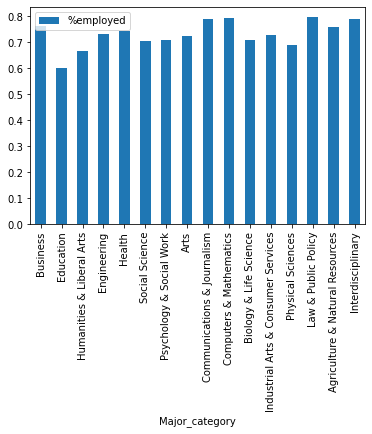

In [15]:
all_ages_major_category.sort_values('Total', ascending=False)[['%employed']].plot(kind='bar')

**INSERT DESCRIPTION FOR THE ABOVE ALL_AGES GRAPH**

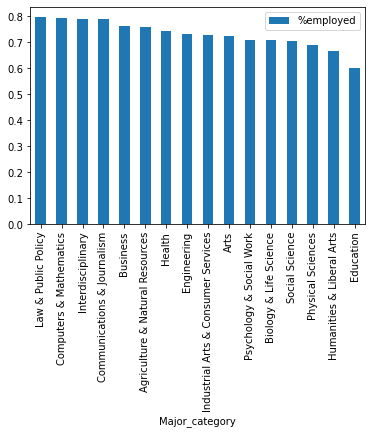

In [16]:
all_ages_major_category.sort_values('%employed', ascending=False)[['%employed']].plot(kind='bar')

**INSERT DESCRIPTION FOR THE ABOVE ALL_AGES GRAPH**

**INSERT STATEMENT GOING TO THE NEXT DATASET**

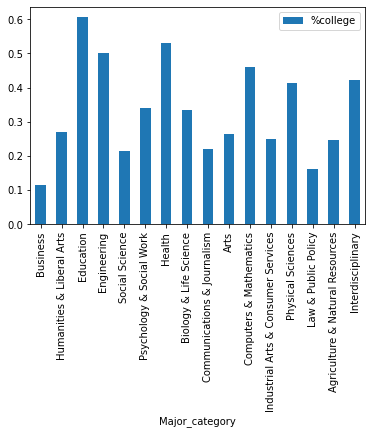

In [17]:
recent_grads_major_category.sort_values('Total', ascending=False)[['%college']].plot(kind='bar')

**INSERT DESCRIPTION FOR THE ABOVE RECENT_GRADS GRAPH**

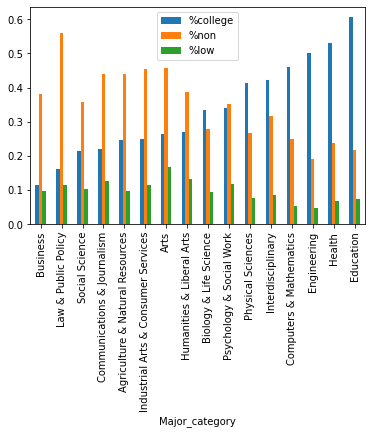

In [18]:
recent_grads_major_category.sort_values('%college', ascending=True)[['%college', '%non', '%low']].plot(kind='bar')

**INSERT DESCRIPTION FOR THE ABOVE GRAPH**

**INSERT STATEMENT ABOUT THE NEXT DATASET**

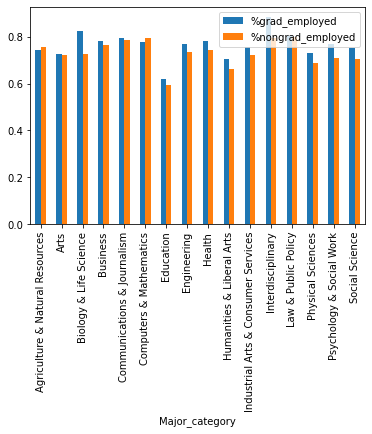

In [19]:
grad_students_major_category[['%grad_employed', '%nongrad_employed']].plot(kind='bar')

It looks like the rate of employment of graduate students and non-graduate students are roughly similar, but we graph the difference to make sure.

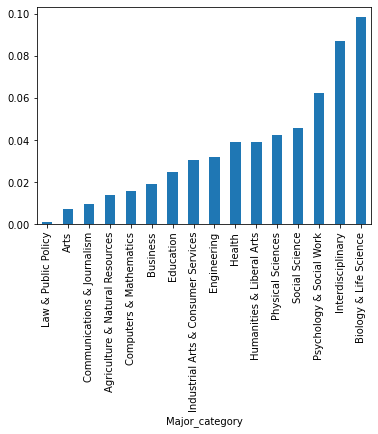

In [20]:
grad_students_major_category['%difference'].sort_values(ascending=True).plot(kind='bar')

**INSERT DESCRIPTION OF GRAD_STUDENTS GRAPH ABOVE**

**INSERT DESCRIPTION OF THE BELOW REG PLOTS**

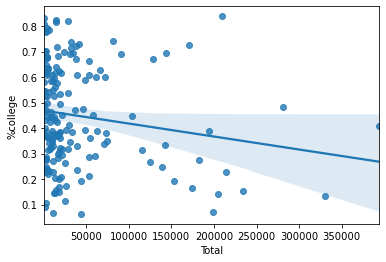

In [21]:
sns.regplot(data=recent_grads, x='Total', y='%college')

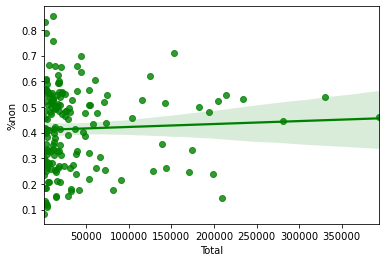

In [22]:
sns.regplot(data=recent_grads, x='Total', y='%non', color='g')

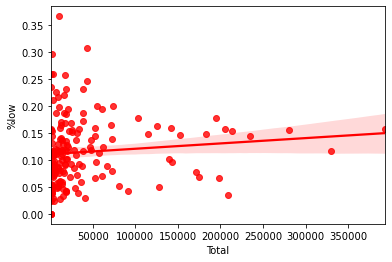

In [23]:
sns.regplot(data=recent_grads, x='Total', y='%low', color='r')

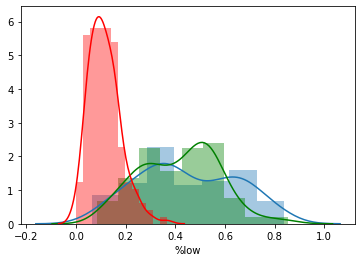

In [24]:
sns.distplot(recent_grads['%college'])
sns.distplot(recent_grads['%non'], color='g')
sns.distplot(recent_grads['%low'], color='r')

In [25]:
#change the column title of %college since OLS doesn't recognize the columns name
percent_recent_grads = recent_grads
percent_recent_grads['per_college'] = percent_recent_grads['%college']
percent_recent_grads['per_non'] = percent_recent_grads['%non']
percent_recent_grads['per_low'] = percent_recent_grads['%low']

outcome, predictor = patsy.dmatrices('per_college ~ Total', percent_recent_grads)
mod = sm.OLS(outcome, predictor)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            per_college   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     4.616
Date:                Tue, 16 Mar 2021   Prob (F-statistic):             0.0331
Time:                        13:10:32   Log-Likelihood:                 36.722
No. Observations:                 171   AIC:                            -69.44
Df Residuals:                     169   BIC:                            -63.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4684      0.018     26.459      0.0

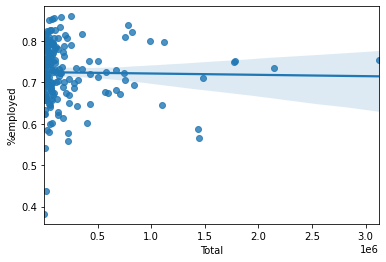

In [26]:
sns.regplot(data=all_ages, x='Total', y='%employed')

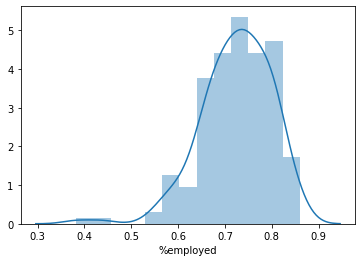

In [27]:
sns.distplot(all_ages['%employed'])

In [28]:
percent_all_ages = all_ages
percent_all_ages['per_employed'] = percent_all_ages['%employed']

outcome, predictor = patsy.dmatrices('per_employed ~ Total', percent_all_ages)
mod = sm.OLS(outcome, predictor)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           per_employed   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                   0.05440
Date:                Tue, 16 Mar 2021   Prob (F-statistic):              0.816
Time:                        13:10:33   Log-Likelihood:                 200.68
No. Observations:                 173   AIC:                            -397.4
Df Residuals:                     171   BIC:                            -391.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7249      0.007    109.626      0.0

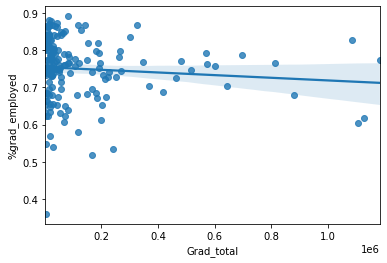

In [29]:
sns.regplot(data=grad_students, x='Grad_total', y='%grad_employed')

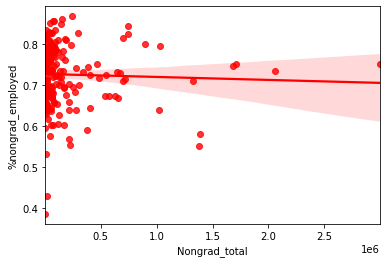

In [30]:
sns.regplot(data=grad_students, x='Nongrad_total', y='%nongrad_employed', color='r')

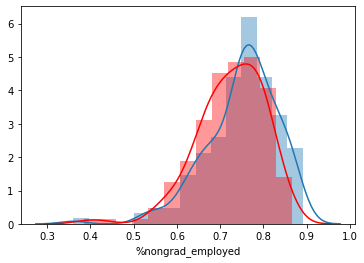

In [31]:
sns.distplot(grad_students['%grad_employed'])
sns.distplot(grad_students['%nongrad_employed'], color='r')

In [32]:
#grad_students['%difference'] = abs(1-grad_students['%grad_employed']-grad_students['%nongrad_employed'])
#sns.distplot(grad_students['%difference'], color='g')

In [33]:
percent_grad_students = grad_students
percent_grad_students['per_grad_employed'] = percent_grad_students['%grad_employed']
percent_grad_students['per_nongrad_employed'] = percent_grad_students['%nongrad_employed']

outcome, predictor = patsy.dmatrices('per_grad_employed ~ Grad_total', percent_grad_students)
mod = sm.OLS(outcome, predictor)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:      per_grad_employed   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.518
Date:                Tue, 16 Mar 2021   Prob (F-statistic):              0.220
Time:                        13:10:34   Log-Likelihood:                 185.68
No. Observations:                 173   AIC:                            -367.4
Df Residuals:                     171   BIC:                            -361.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7545      0.007    103.022      0.0

In [34]:
outcome, predictor = patsy.dmatrices('per_nongrad_employed ~ Nongrad_employed', percent_grad_students)
mod = sm.OLS(outcome, predictor)
res = mod.fit()
print(res.summary())

                             OLS Regression Results                             
Dep. Variable:     per_nongrad_employed   R-squared:                       0.000
Model:                              OLS   Adj. R-squared:                 -0.006
Method:                   Least Squares   F-statistic:                   0.03287
Date:                  Tue, 16 Mar 2021   Prob (F-statistic):              0.856
Time:                          13:10:34   Log-Likelihood:                 194.00
No. Observations:                   173   AIC:                            -384.0
Df Residuals:                       171   BIC:                            -377.7
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           

# Ethics & Privacy

**Privacy:** The dataset we received from FiveThirtyEight contained only a list of majors and the counts of the amount of grads within each major. Individual graduates and personally identifiable information are not listed, therefore we do not need to anonymize the data.

**Ethics:** Our initial concern focused around the precedent for bias between demographic information and employment rates. However, without the inclusion of individual ethnicities or demographic backgrounds, the datasets should not leave any room to discriminate against certain groups of people. Containing only major, gender, and employment situations, we should be able to focus solely on the relationship between major departments and employment rates without worry of overlooking certain groups of people. 

**THESE MIGHT NEED TO BE EXPANDED**

# Conclusion & Discussion

*Fill in your discussion information here*

# Team Contributions

- Alex Cheng
- Samarth Arora
- Terence Ting
- Thomas Kolinek
- Yicong Guo